In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Recommendation Systems

## Content Based Recommendation Systems

![content_based](content_based.png)

# Collaborative Filtering Systems#

![collaborative_filtering](collaborative_filtering.png)

In [2]:
x1, y1 = (1, 5)
x2, y2 = (5, 2)


a = [x1, y1]
b = [x2, y2]

## Euclidean distance

Euclidean distance: 5.0


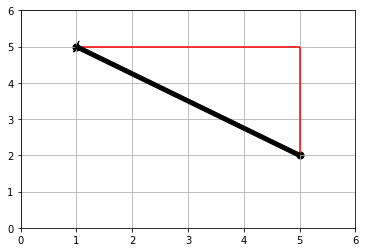

In [3]:
plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
plt.xlim([0, 6])
plt.ylim([0, 6])

# higher distance
plt.vlines(max(x1, x2), min(y2,y1), max(y1,y2), color='red')
plt.hlines(max(y1, y2), min(x1,x2), max(x1,x2), color='red')

plt.annotate('', xy=(x1,y1), xytext=(x2, y2), arrowprops=dict(facecolor='black', 
                                                              shrink=0,
                                                              headlength=0.0001))

print(f'Euclidean distance: {np.sqrt((x2-x1)**2 + (y2-y1)**2)}')

In [5]:
ratings = pd.read_csv('./data/movie_ratings.csv').set_index('Movie').T
ratings.head()

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


In [6]:

def ratings_scatter(movie1, movie2):
    x = ratings.loc[:, movie1]
    y = ratings.loc[:, movie2]
    n = list(ratings.index)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y, s=50, marker='x')
    plt.title(f"Preference Space for {movie1} vs. {movie2}", fontsize=20)
    plt.grid()
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 

    for i, txt in enumerate(n):
        
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

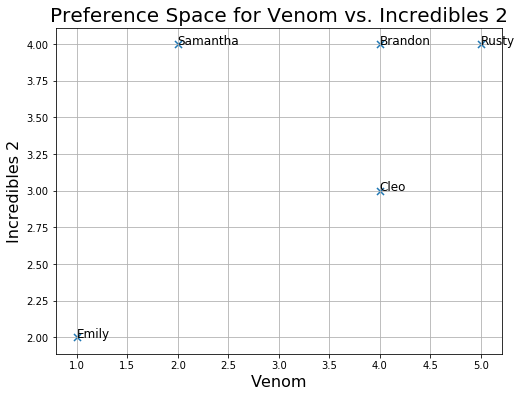

In [7]:
ratings_scatter('Venom', 'Incredibles 2')

# Measuring distances in python

`scipy.spatial.distance.pdist`<br>
`sklearn.metrics   pdist, squareform`

## Toy problem

In [8]:
a = (x1,y1)
b = (x2, y2)

In [9]:
a

(1, 5)

In [10]:
b

(5, 2)

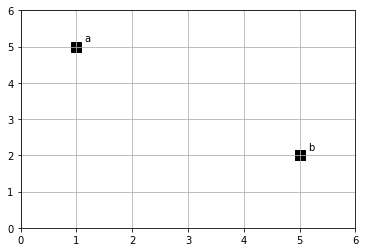

In [11]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', marker='s', s=100)
plt.scatter(x2, y2, color='k', marker='s', s=100)
plt.grid()
plt.xlim([0, 6])
plt.ylim([0, 6])

plt.annotate('a',np.array(a) + (0.15, 0.15));
plt.annotate('b',np.array(b) + (0.15, 0.15));

In [12]:
from sklearn.metrics import pairwise_distances

pairwise_distances([a, b])

array([[0., 5.],
       [5., 0.]])

In [13]:
from sklearn.metrics import pairwise_distances

pairwise_distances([a,b])

array([[0., 5.],
       [5., 0.]])

In [ ]:
from scipy.spatial.distance import pdist, squareform

pdist([a,b])

In [ ]:
squareform(pdist([a, b]))

In [ ]:
pd.DataFrame(squareform(pdist([a, b])), 
             index=['a','b'], 
             columns=['a','b'])

## Real application: Measuring distance in terms of movie ratings

In [ ]:
ratings = pd.read_csv('movie_ratings.csv').set_index('Movie').T
ratings.head()

In [ ]:
ratings_scatter('Venom', 'Incredibles 2')

In [ ]:
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

In [ ]:
# pairwise distance
distance = squareform(pdist(ratings[['Venom', 'Incredibles 2']]))
distance

## What happens if we calculated the distance for the whole dataset, then?

It considers all columns as dimensions. And it will calculate the distance in that big dimension.

In [ ]:
# pairwise distance
distance = pdist(ratings)
distance

In [ ]:
squareform(distance)

In [ ]:
distance_matrix = pd.DataFrame(squareform(distance), 
                               index=ratings.index, 
                               columns=ratings.index)
distance_matrix

In [ ]:
# inverse of distance is how similar: 1/squareform(distance)
# but I want to put the most similar as 1: 1/(1 + squareform(distance))


In [ ]:
similarity_index = pd.DataFrame(1/(1 + squareform(distance)), 
                                index=ratings.index, 
                                columns=ratings.index)
similarity_index

In [ ]:
def create_similarity(dataframe, metric='euclidean'):
    """
    Given a dataframe, return its similarity matrix 
    """
    distance_vector = pdist(dataframe, metric)
    distance_matrix = squareform(distance_vector)
    similarities = 1 / (1 + distance_matrix)
    
    similarity_index = pd.DataFrame(similarities, 
                                    index=dataframe.index, 
                                    columns=dataframe.index)
    return similarity_index

In [ ]:
create_similarity(ratings)

In [ ]:
new_person = {'Aquaman': 2,
              'Avengers: Infinity War': 1,
              'Black Panther': 5,
              'Bohemian Rhapsody': 5,
              'Deadpool 2': 2,
              'Fantastic Beasts: The Crimes of Grindelwald': 3,
              'Incredibles 2': 3,
              'Jurassic World: Fallen Kingdom': 4,
              'Mission: Impossible – Fallout': 3,
              'Venom': 3}

In [ ]:
ratings

In [ ]:
person = pd.DataFrame(pd.Series(new_person, name='Andre')).T
person

In [ ]:
merged_dataframe = pd.concat([ratings, person], axis=0)
merged_dataframe

In [ ]:
similarities = create_similarity(merged_dataframe)
similarities

In [ ]:
similarities['Andre']

In [ ]:
similarities['Andre'].drop('Andre')

In [ ]:
new_ratings = pd.read_csv('movie_ratings2.csv').set_index('Movie')
new_ratings.head()

In [ ]:
recommendations = new_ratings.copy()
recommendations.head()

In [ ]:
similarities['Andre'].drop('Andre')

In [ ]:
for name, score in dict(similarities['Andre'].drop('Andre')).items():
    # contribuição de todos os meus amigos, 
    # ponderados pela distância deles para mim (score)
    recommendations[name] = recommendations[name] * score

recommendations.head()

In [ ]:
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

## Different Distance measures

Minkowski Distance

<font size="7">
$$ \left(\sum_i^n|x_i - y_i|^p\right)^\frac{1}{p} $$
</font>



<b> Manhattan distance (cityblock): p = 1 </b>
$$ \sum_i^n|x_i - y_i| $$


<b> Euclidean Distance: p = 2 </b>
$$ \sqrt{\sum_i^n|x_i - y_i|^2} $$

<b> Chebychev Distance: p $\rightarrow \infty$  </b>
$$ \left(\sum_i^n|x_i - y_i|^\infty\right)^\frac{1}{\infty} \rightarrow max(|x_i - y_i|)$$


## Manhattan distance:

In [ ]:
plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
plt.xlim([0, 6])
plt.ylim([0, 6])

# higher distance
plt.vlines(max(x1, x2), min(y2,y1), max(y1,y2), color='red')
plt.hlines(max(y1, y2), min(x1,x2), max(x1,x2), color='red')

k = 1
plt.vlines(max(x1, x2), min(y2,y1), max(y1,y2)-k, color='blue', alpha=0.5)
plt.hlines(max(y1,y2)-k, min(x1,x2), max(x1,x2), color='blue', alpha=0.5)
plt.vlines(min(x1,x2), max(y2,y1)-k, max(y1,y2), color='blue', alpha=0.5)

print(f'Manhattan distance: {abs(x2-x1) + abs(y2-y1)}')

## Cosine Distance

In [ ]:
x1, y1 = (1, 5)
x2, y2 = (4, 2)

a = [x1, y1]
b = [x2, y2]

In [ ]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
plt.xlim([0, 6])
plt.ylim([0, 6])


plt.annotate('', xy=(x1,y1), xytext=(0, 0), arrowprops=dict(facecolor='black', 
                                                            
                                                            headlength=10))

plt.annotate('', xy=(x2,y2), xytext=(0, 0), arrowprops=dict(facecolor='black', 
                                                            
                                                            headlength=10))

print(f'Cosine distance: {1 - np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))}')

In [ ]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
plt.xlim([-2, 6])
plt.ylim([-2, 6])


plt.annotate('', xy=(x1,y1), xytext=(0, 0), arrowprops=dict(facecolor='black', 
                                                            
                                                            headlength=10))

plt.annotate('', xy=(x2,y2), xytext=(0, 0), arrowprops=dict(facecolor='black', 
                                                            
                                                            headlength=10))

print(f'Cosine distance: {1 - np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))}')

In [ ]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', s=50)
plt.scatter(x2, y2, color='k', s=50)
plt.grid()
plt.xlim([-2, 6])
plt.ylim([-2, 6])
cosine_similarity = np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))

plt.annotate('', xy=(x1,y1), xytext=(0, 0), arrowprops=dict(facecolor='black', 
                                                            shrink=0,
                                                            headlength=10))

plt.annotate('', xy=(x2,y2), xytext=(0, 0), arrowprops=dict(facecolor='black', 
                                                            shrink=0,
                                                            headlength=10))

plt.annotate('', xy=(x2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5),  
                     y2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5)), xytext=(0, 0), 
                                            arrowprops=dict(facecolor='red', 
                                                            shrink=0,
                                                            headlength=10))


plt.annotate('', xy=(x2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5),
                     y2 * cosine_similarity * (np.dot(a,a)**.5/np.dot(b,b)**.5)), xytext=(x1, y1), 
             arrowprops={"arrowstyle" : "-", "linestyle" : "--", "linewidth" : 2, "shrinkA": 0, "shrinkB": 0})
